<a href="https://colab.research.google.com/github/AlbusDracoSam/DeepSight_NLU/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [129]:
!pip install scikit-plot
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [130]:
import numpy as np
import keras
from  keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import os
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import scikitplot
from scikitplot.metrics import plot_confusion_matrix

# Import data

In [131]:
train = 'https://raw.githubusercontent.com/AlbusDracoSam/DeepSight_NLU/main/data/Train.txt'
test = 'https://raw.githubusercontent.com/AlbusDracoSam/DeepSight_NLU/main/data/Test.txt' 
val =  'https://raw.githubusercontent.com/AlbusDracoSam/DeepSight_NLU/main/data/Val.txt'

In [132]:
df_train = pd.read_csv(train, header =None, sep =';', names = ['Text','Sentiment'], encoding='utf-8')
df_test = pd.read_csv(test, header = None, sep =';', names = ['Text','Sentiment'],encoding='utf-8')
df_val=pd.read_csv(val,header=None,sep=';',names=['Text','Sentiment'],encoding='utf-8')

# EDA

In [133]:
len(df_train)

16000

In [134]:
df_train.head()

,Text,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love
4,i am feeling grouchy,anger


In [135]:
df_train.Sentiment.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Sentiment, dtype: int64

In [136]:
df_train.describe()

,Text,Sentiment
count,16000,16000
unique,15969,6
top,i write these words i feel sweet baby kicks from within and my memory is refreshed i would do anything for this boy,joy
freq,2,5362


# Data Cleaning and Processing

In [137]:
df_train['Text'] = df_train['Text'].str.replace("[^a-zA-Z]", " ") 
df_test['Text'] = df_test['Text'].str.replace("[^a-zA-Z]", " ") 
df_val['Text'] = df_val['Text'].str.replace("[^a-zA-Z]", " ") 


In [138]:
df_train.head()

,Text,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love
4,i am feeling grouchy,anger


**Removing stop words**

In [139]:
stopwords=nltk.corpus.stopwords.words('english')

In [140]:
def remove_stopwords(text):
    Text =' '.join([word for word in text.split() if word not in stopwords])
    return Text

In [141]:
df_train['Text'] = df_train['Text'].apply(lambda text : remove_stopwords(text.lower()))
df_test['Text'] = df_test['Text'].apply(lambda text : remove_stopwords(text.lower()))
df_val['Text'] = df_val['Text'].apply(lambda text : remove_stopwords(text.lower()))
df_train.head()

,Text,Sentiment
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around someone cares awake,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still property,love
4,feeling grouchy,anger


**Tokenization and Stemming**

In [142]:
df_train['Text'] = df_train['Text'].apply(lambda x: x.split())
df_test['Text'] = df_test['Text'].apply(lambda x: x.split())
df_val['Text'] = df_val['Text'].apply(lambda x: x.split())
df_train.head()

,Text,Sentiment
0,"[didnt, feel, humiliated]",sadness
1,"[go, feeling, hopeless, damned, hopeful, around, someone, cares, awake]",sadness
2,"[im, grabbing, minute, post, feel, greedy, wrong]",anger
3,"[ever, feeling, nostalgic, fireplace, know, still, property]",love
4,"[feeling, grouchy]",anger


In [143]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
df_train['Text'] = df_train['Text'].apply(lambda x: [stemmer.stem(i) for i in x])
df_test['Text'] = df_test['Text'].apply(lambda x: [stemmer.stem(i) for i in x])
df_val['Text'] = df_val['Text'].apply(lambda x: [stemmer.stem(i) for i in x])
df_train.head()

,Text,Sentiment
0,"[didnt, feel, humili]",sadness
1,"[go, feel, hopeless, damn, hope, around, someon, care, awak]",sadness
2,"[im, grab, minut, post, feel, greedi, wrong]",anger
3,"[ever, feel, nostalg, fireplac, know, still, properti]",love
4,"[feel, grouchi]",anger


Reforming the tokens

In [144]:
df_train['Text'] = df_train['Text'].apply(lambda x: ' '.join([w for w in x]))
df_train.head()

,Text,Sentiment
0,didnt feel humili,sadness
1,go feel hopeless damn hope around someon care awak,sadness
2,im grab minut post feel greedi wrong,anger
3,ever feel nostalg fireplac know still properti,love
4,feel grouchi,anger


In [145]:
df_test['Text'] = df_test['Text'].apply(lambda x: ' '.join([w for w in x]))
df_val['Text'] = df_val['Text'].apply(lambda x: ' '.join([w for w in x]))

**Removing words lesser than 3 letters**

In [146]:
df_train['Text'] = df_train['Text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df_train.head()

,Text,Sentiment
0,didnt feel humili,sadness
1,feel hopeless damn hope around someon care awak,sadness
2,grab minut post feel greedi wrong,anger
3,ever feel nostalg fireplac know still properti,love
4,feel grouchi,anger


In [147]:
df_test['Text'] = df_test['Text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df_val['Text'] = df_val['Text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Word cloud

**Word cloud for JOY** 

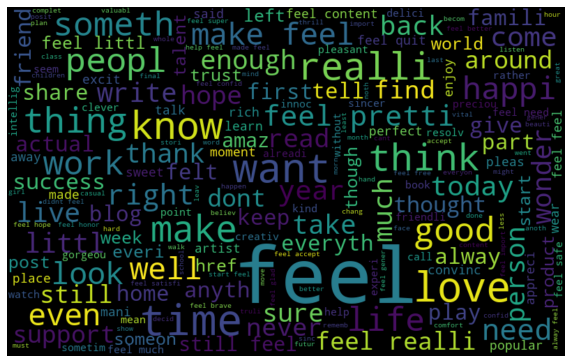

In [148]:
from wordcloud import WordCloud 

joy_words =' '.join([text for text in df_train['Text'][df_train['Sentiment'] == 'joy']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(joy_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

**Word cloud for SURPRISE** 

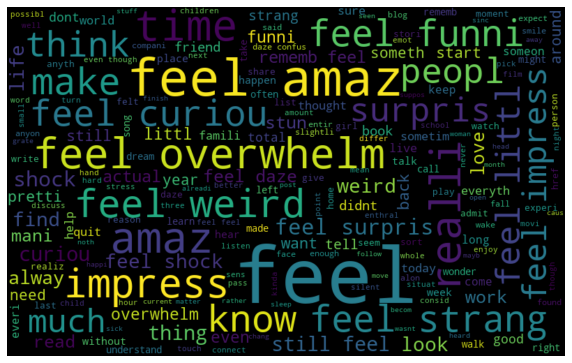

In [149]:
from wordcloud import WordCloud 

surprise_words =' '.join([text for text in df_train['Text'][df_train['Sentiment'] == 'surprise']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(surprise_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

**Word cloud for LOVE**

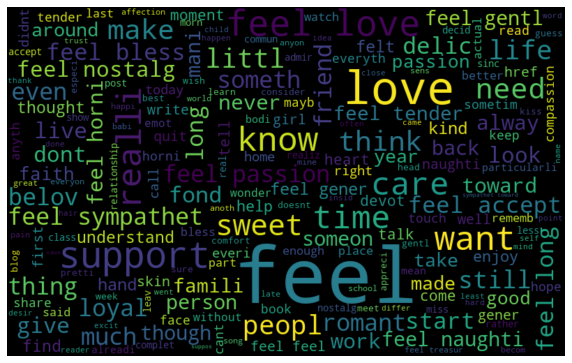

In [150]:
from wordcloud import WordCloud 

love_words =' '.join([text for text in df_train['Text'][df_train['Sentiment'] == 'love']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(love_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

**Word cloud for SADNESS**

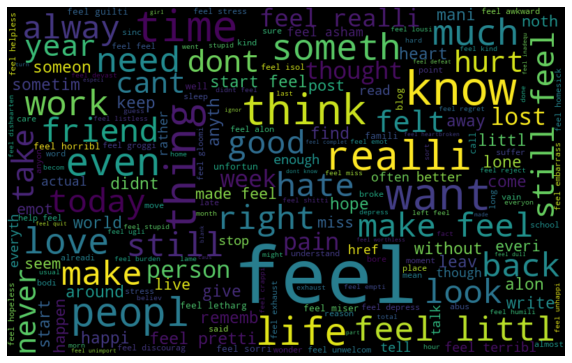

In [151]:
from wordcloud import WordCloud 

sad_words =' '.join([text for text in df_train['Text'][df_train['Sentiment'] == 'sadness']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(sad_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

**Word cloud for FEAR**

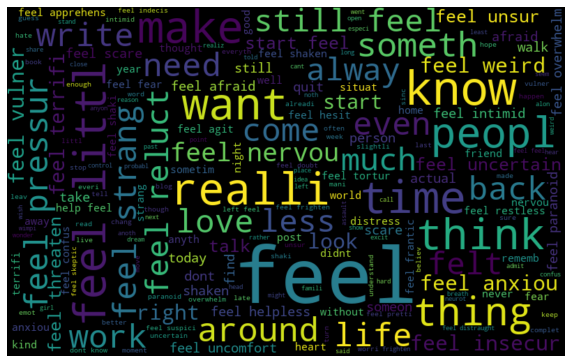

In [152]:
from wordcloud import WordCloud 

fear_words =' '.join([text for text in df_train['Text'][df_train['Sentiment'] == 'fear']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(fear_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

**Word cloud for ANGER**

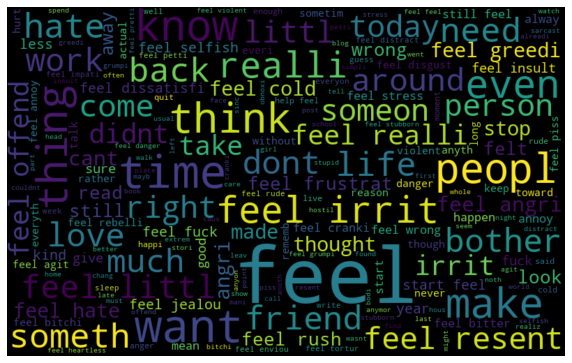

In [153]:
from wordcloud import WordCloud 

anger_words =' '.join([text for text in df_train['Text'][df_train['Sentiment'] == 'anger']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(anger_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

# Model Building

In [154]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [155]:
count_vectorizer = CountVectorizer(stop_words='english') 
cv = count_vectorizer.fit_transform(df_train['Text'])
cv.shape

(16000, 9340)

In [156]:
X_train,X_test,y_train,y_test = train_test_split(cv,df_train['Sentiment'] , test_size=.2,stratify=df_train['Sentiment'], random_state=42)


**XG Boost**

In [157]:
xgbc = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)
xgbc.fit(X_train,y_train)
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(prediction_xgb,y_test))
XGB = accuracy_score(prediction_xgb,y_test)

0.84875


**Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train,y_train)
prediction_rf = rf.predict(X_test)
print(accuracy_score(prediction_rf,y_test))

**SVM**

In [ ]:
svc = svm.SVC()
svc.fit(X_train,y_train)
prediction_svc = svc.predict(X_test)
print(accuracy_score(prediction_svc,y_test))

**Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
prediction_lr = lr.predict(X_test)
print(accuracy_score(prediction_lr,y_test))

In [ ]:
accuracies = [96.05, 95.92, 96.19, 96.28]
algos = ["XGB", "Random Forest", "SVM", "Logistic regression"]

plt.bar(algos, accuracies, color ='blue',
        width = 0.4)